In [93]:
# Importing packages  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [94]:
# Getting rid of warnings  
import warnings  
warnings.filterwarnings("ignore")

In [95]:
# Preparing the .tsv datasets    

data_folder = '/Users/svenhominal/Desktop/ADA/24102024_project/ada-2024-project-adarable/MovieSummaries/'
character_columns = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]
character_metadata = pd.read_table(data_folder + 'character.metadata.tsv', names = character_columns)  

In [96]:
movie_columns = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages (Freebase ID:name tuples)',
    'Movie countries (Freebase ID:name tuples)',
    'Movie genres (Freebase ID:name tuples)'
]

# Read the movie metadata file with the specified column names
movie_metadata = pd.read_table(data_folder + 'movie.metadata.tsv', names=movie_columns)

In [97]:
# Checking if structure is correct  
character_metadata.head()   

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [98]:
movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [99]:
# Testing/Describing some variables  
character_metadata['Actor height (in meters)'].describe()    

count    154824.000000
mean          1.788893
std           4.379940
min           0.610000
25%           1.676400
50%           1.750000
75%           1.830000
max         510.000000
Name: Actor height (in meters), dtype: float64

In [100]:
# Setting the .txt into Pandas dataframes
name_clusters_path = data_folder + 'name.clusters.txt'
tvtropes_clusters_path = data_folder + 'tvtropes.clusters.txt'
plot_summaries_path = data_folder + 'plot_summaries.txt'

# Read the name.clusters.txt file
name_clusters = pd.read_csv(name_clusters_path, sep='\t', header=None, names=['Character Name', 'Freebase ID'])

# Read the tvtropes.clusters.txt file
tvtropes_clusters = pd.read_csv(tvtropes_clusters_path, sep='\t', header=None, names=['Trope', 'Details'])

# Convert the 'Details' column from JSON strings to dictionaries
tvtropes_clusters['Details'] = tvtropes_clusters['Details'].apply(eval)

# Normalize the 'Details' column to separate columns
tvtropes_clusters = tvtropes_clusters.join(pd.json_normalize(tvtropes_clusters['Details'])).drop(columns=['Details'])

# Read the plot_summaries.txt file
plot_summaries = pd.read_csv(plot_summaries_path, sep='\t', header=None, names=['Wikipedia movie ID', 'Plot Summary'])

# Display the first few rows of each DataFrame to verify
print(plot_summaries.head())

tvtropes_clusters.sample(10)

   Wikipedia movie ID                                       Plot Summary
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
1            31186339  The nation of Panem consists of a wealthy Capi...
2            20663735  Poovalli Induchoodan  is sentenced for six yea...
3             2231378  The Lemon Drop Kid , a New York City swindler,...
4              595909  Seventh-day Adventist Church pastor Michael Ch...


,Trope,char,movie,id,actor
365,officer_and_a_gentleman,Captain Nicholls,War Horse,/m/0gkcn1g,Tom Hiddleston
256,father_to_his_men,Major Henry West,28 Days Later,/m/0jskmk,Christopher Eccleston
307,henpecked_husband,Dr. Howard Bannister,"What's Up, Doc?",/m/0k7_cy,Ryan O'Neal
99,charmer,Hannibal Lecter,The Silence of the Lambs,/m/0k6g86,Anthony Hopkins
471,tranquil_fury,Inigo Montoya,The Princess Bride,/m/0k65z5,Mandy Patinkin
343,loveable_rogue,Eames,Inception,/m/07lkzl3,Tom Hardy
79,byronic_hero,Bill 'The Butcher' Cutting,Gangs of New York,/m/0jynbm,Daniel Day-Lewis
415,romantic_runnerup,Julian Mercer,Something's Gotta Give,/m/0k3jn6,Keanu Reeves
336,loser_protagonist,Dewey Finn,School of Rock,/m/0k2zjf,Jack Black
413,romantic_runnerup,Prince Edward,Enchanted,/m/0jxvm9,James Marsden


In [101]:
# List of all the tropes  
unique_tropes = tvtropes_clusters['Trope'].unique().tolist()

# Display the list of unique tropes
print(unique_tropes)    

['absent_minded_professor', 'adventurer_archaeologist', 'arrogant_kungfu_guy', 'big_man_on_campus', 'bounty_hunter', 'brainless_beauty', 'broken_bird', 'bromantic_foil', 'bruiser_with_a_soft_center', 'bully', 'byronic_hero', 'casanova', 'chanteuse', 'charmer', 'child_prodigy', 'classy_cat_burglar', 'consummate_professional', 'corrupt_corporate_executive', 'coward', 'crazy_jealous_guy', 'crazy_survivalist', 'cultured_badass', 'dean_bitterman', 'dirty_cop', 'ditz', 'doormat', 'drill_sargeant_nasty', 'dumb_blonde', 'dumb_muscle', 'eccentric_mentor', 'egomaniac_hunter', 'evil_prince', 'fastest_gun_in_the_west', 'father_to_his_men', 'final_girl', 'gadgeteer_genius', 'gentleman_thief', 'granola_person', 'grumpy_old_man', 'hardboiled_detective', 'heartbroken_badass', 'henpecked_husband', 'hitman_with_a_heart', 'jerk_jock', 'junkie_prophet', 'klutz', 'loser_protagonist', 'loveable_rogue', 'master_swordsman', 'morally_bankrupt_banker', 'officer_and_a_gentleman', 'ophelia', 'playful_hacker', 'pr

In [102]:
# Anti-heroes  

# List of keywords associated with anti-heroes
anti_hero_keywords = ['anti_hero', 'villain', 'rogue', 'outlaw', 'rebel', 'dark','protagonist']

# Filter the unique tropes list for anti-hero related tropes
anti_hero_tropes = [trope for trope in unique_tropes if any(keyword in trope.lower() for keyword in anti_hero_keywords)]

# Display the list of anti-hero tropes
print(anti_hero_tropes)    


['loser_protagonist', 'loveable_rogue', 'retired_outlaw']


In [103]:

# Filter the tvtropes_clusters DataFrame for anti-hero tropes
anti_hero_movies = tvtropes_clusters[tvtropes_clusters['Trope'].isin(anti_hero_tropes)]

# Print the movies with anti-heroes
#print(anti_hero_movies[['Trope', 'char', 'movie', 'id', 'actor']])  

anti_hero_movies.sample(15)  

,Trope,char,movie,id,actor
335,loser_protagonist,Mark Bellison,The Invention of Lying,/m/062xh9l,Ricky Gervais
403,retired_outlaw,The Sundance Kid,Butch Cassidy and the Sundance Kid,/m/0jvzx9,Robert Redford
336,loser_protagonist,Dewey Finn,School of Rock,/m/0k2zjf,Jack Black
334,loser_protagonist,Dennis,"Run, Fat Boy, Run",/m/03lvx8n,Simon Pegg
402,retired_outlaw,Butch Cassidy,Butch Cassidy and the Sundance Kid,/m/04ky2tz,Paul Newman
346,loveable_rogue,Wolverine,X-Men,/m/0k86q4,Hugh Jackman
404,retired_outlaw,Patrick Floyd 'Pat' Garrett,Young Guns II,/m/03jsysn,William Petersen
339,loveable_rogue,Captain Jack Sparrow,Pirates of the Caribbean: Dead Man's Chest,/m/0k1xxm,Johnny Depp
340,loveable_rogue,Peter Blood,Captain Blood,/m/02vb_m3,Errol Flynn
341,loveable_rogue,Capt. Louis Renault,Casablanca,/m/05286qg,Claude Rains


In [104]:
# MERGING ON MOVIE NAME TVTROPES CLUSTERS TO MOVIE_METADATA, FOR ANTI-HEROES MOVIES

# Ensure the movie name columns are consistent
anti_hero_movies.rename(columns={'movie': 'Movie name'}, inplace=True)

# Merge anti-hero movies with movie metadata to get box office revenue based on movie name
anti_hero_movie_metadata = pd.merge(anti_hero_movies, movie_metadata, on='Movie name')

# Ensure the "Movie box office revenue" column is in a consistent numeric format
anti_hero_movie_metadata['Movie box office revenue'] = pd.to_numeric(anti_hero_movie_metadata['Movie box office revenue'], errors='coerce')
anti_hero_movie_metadata = anti_hero_movie_metadata[anti_hero_movie_metadata['Movie box office revenue'].notna()]

# Display the resulting DataFrame to verify the merge
anti_hero_dataset = anti_hero_movie_metadata[['Trope', 'char', 'Movie name', 'id', 'actor', 'Movie box office revenue', 'Freebase movie ID']]

# Display a sample of the DataFrame  

anti_hero_dataset.sample(15)

,Trope,char,Movie name,id,actor,Movie box office revenue,Freebase movie ID
22,retired_outlaw,Butch Cassidy,Butch Cassidy and the Sundance Kid,/m/04ky2tz,Paul Newman,102308889.0,/m/0p9tm
3,loser_protagonist,Mark Bellison,The Invention of Lying,/m/062xh9l,Ricky Gervais,32054454.0,/m/05zpghd
20,retired_outlaw,William Munny,Unforgiven,/m/0k7l31,Clint Eastwood,159157447.0,/m/0_92w
24,retired_outlaw,Patrick Floyd 'Pat' Garrett,Young Guns II,/m/03jsysn,William Petersen,44143410.0,/m/031zk3
16,loveable_rogue,Rodney Skinner,The League of Extraordinary Gentlemen,/m/0k5ns5,Tony Curran,179265204.0,/m/0bl3nn
21,retired_outlaw,Ned Logan,Unforgiven,/m/04xg29q,Morgan Freeman,159157447.0,/m/0_92w
5,loser_protagonist,Rob Gordon,High Fidelity,/m/02vb_jp,John Cusack,47126295.0,/m/025rxjq
15,loveable_rogue,Eames,Inception,/m/07lkzl3,Tom Hardy,825532764.0,/m/0661ql3
1,loser_protagonist,Sidney Young,How to Lose Friends & Alienate People,/m/040l_q8,Simon Pegg,19151797.0,/m/03c_4fq
6,loveable_rogue,Han Solo,Star Wars Episode IV: A New Hope,/m/0k3r1_,Harrison Ford,775398007.0,/m/0dtfn


In [105]:
# For hero movies 
# List of keywords associated with heroes
hero_keywords = ['hero', 'champion', 'savior', 'knight', 'guardian']

# Filter the unique tropes list for hero-related tropes
hero_tropes = [trope for trope in unique_tropes if any(keyword in trope.lower() for keyword in hero_keywords)]

# Filter the tvtropes_clusters DataFrame for hero tropes
hero_movies = tvtropes_clusters[tvtropes_clusters['Trope'].isin(hero_tropes)]

# Ensure the movie name columns are consistent
hero_movies.rename(columns={'movie': 'Movie name'}, inplace=True)

# Merge hero movies with movie metadata to get box office revenue based on movie name
hero_movie_metadata = pd.merge(hero_movies, movie_metadata, on='Movie name')
hero_movie_metadata = hero_movie_metadata[hero_movie_metadata['Movie box office revenue'].notna()]

# Ensure the "Movie box office revenue" column is in a consistent numeric format
hero_movie_metadata['Movie box office revenue'] = pd.to_numeric(hero_movie_metadata['Movie box office revenue'], errors='coerce')

# Create a dataset with the resulting DataFrame
hero_dataset = hero_movie_metadata[['Trope', 'char', 'Movie name', 'id', 'actor', 'Movie box office revenue']]
print(len(hero_dataset))
# Display a sample of the DataFrame  
hero_dataset.sample(15)

17


,Trope,char,Movie name,id,actor,Movie box office revenue
7,byronic_hero,Martin Q. Blank,Grosse Pointe Blank,/m/0jz0wk,John Cusack,28084357.0
9,byronic_hero,Cobb,Inception,/m/0667g_f,Leonardo DiCaprio,825532764.0
8,byronic_hero,Brand Hauser,War Inc.,/m/02vczvr,John Cusack,580862.0
20,byronic_hero,Tony Stark,Iron Man,/m/0j1__hv,Robert Downey Jr.,585174222.0
13,byronic_hero,Britt Reid,The Green Hornet,/m/0h5m_9x,Seth Rogen,227817248.0
14,byronic_hero,Donnie Darko,Donnie Darko,/m/0jxftx,Jake Gyllenhaal,4116307.0
1,byronic_hero,James Bond,Casino Royale,/m/02hw79s,Daniel Craig,41700000.0
10,byronic_hero,Achilles,Troy,/m/0k7ckp,Brad Pitt,497409852.0
24,byronic_hero,Bill 'The Butcher' Cutting,Gangs of New York,/m/0jynbm,Daniel Day-Lewis,193772504.0
0,byronic_hero,Jake LaMotta,Raging Bull,/m/0k28_g,Robert De Niro,23380203.0


17
17


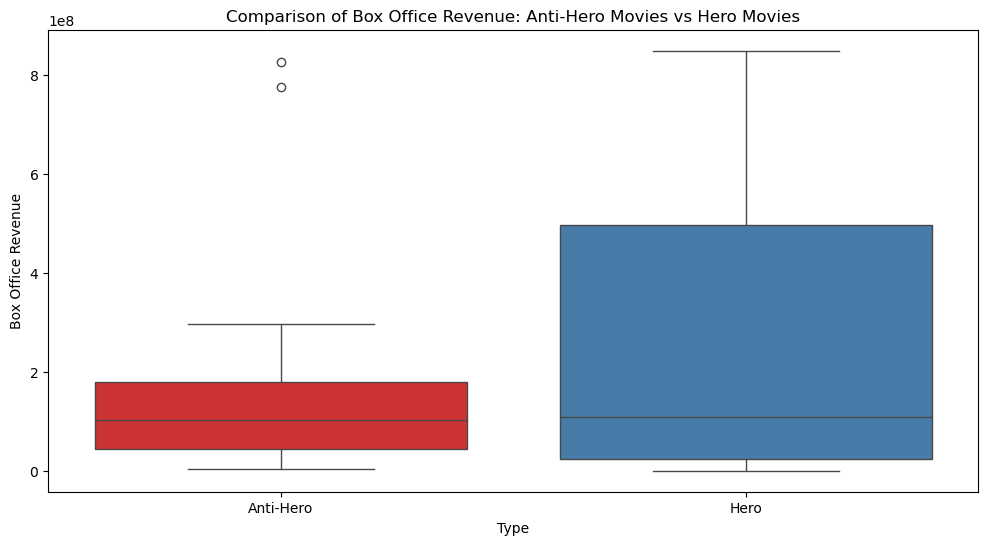

In [106]:
# Comparing (brouillon) the movies with anti-heroes and heroes, in terms of box office revenues  
anti_hero_dataset['Type'] = 'Anti-Hero'  
hero_dataset['Type'] = 'Hero'  
print(len(anti_hero_dataset))  
print(len(hero_dataset))   

# Combine the datasets
combined_dataset = pd.concat([anti_hero_dataset, hero_dataset])

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Movie box office revenue', data=combined_dataset, palette="Set1")
plt.ylabel('Box Office Revenue')
plt.title('Comparison of Box Office Revenue: Anti-Hero Movies vs Hero Movies')
plt.show()
